In [9]:
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from RKHS import GPMI

from utils import RandomUnifBall

from Algorithms import incremental_greedy

from LocalImprove import u_local_improve

from functools import partial


import pickle as pkl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
def trajectory(x1,u):
    '''
    x1.shape = (n,dim) or (dim)
    u.shape = (n,T-1,dim)
    
    Generate x[n,1:T,dim] given x1 and u[n,1:T-1,dim]
    
    '''    
    u_pad = np.pad(u,((0,0),(1,0),(0,0)),'constant',constant_values = 0)
    u_pad[:,0,:] = x1
    return np.cumsum(u_pad,axis=1)

def traj_to_u(x):
    '''
        u_t = x_t - x_{t-1}
        
        x.shape = (n_x,T,x_dim)
        
        output: u. u.shape = (n_x,T-1,x_dim)
    '''
    
    return  x[:,1:,:]-x[:,:-1,:]

# Experiment parameters

In [27]:
T = 10

c = 1
l = 1
var_0 = 0.01


search_region_center = np.array([0.,0.])
search_region_radius = 3
step_size = 1

# The reference system.
ref = np.array([[0,0]]) # A single point reference set.
R = np.array([search_region_radius*np.ones(T)]).T
R[0,0] = 0

N = len(ref)

x0 = search_region_center

# Callables

In [12]:
x_objective = partial(GPMI,c=c,l=l,var_0=var_0)

# u local improvement

In [13]:
straight_line = step_size*np.array([np.arange(T),np.zeros(T)]).T+x0

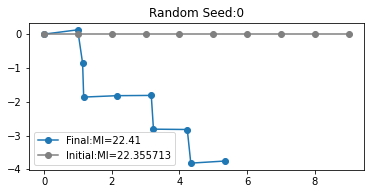

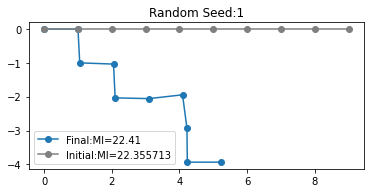

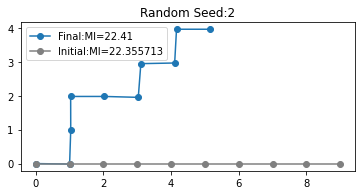

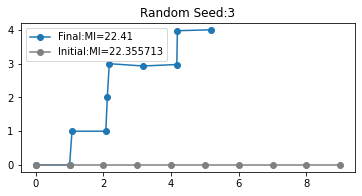

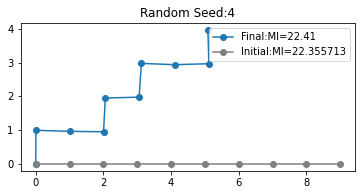

In [33]:
straight_line = step_size*np.array([np.arange(T),np.zeros(T)]).T+x0

iniMI = x_objective(np.array([straight_line]))[0]

n_pass = 20


for seed in range(5):
    
    x = np.array(straight_line)
    np.random.seed(seed)

    for _ in range(n_pass):
        x_best =  u_local_improve(x,x_objective,step_size,ref,R=np.ones((T,len(ref)))*100)

        x = x_best

    MI = x_objective(np.array([x]))[0]
    plt.plot(x[:,0],x[:,1],marker='o',label='Final:MI={:.2f}'.format(MI))
    plt.plot(straight_line[:,0],straight_line[:,1],marker='o',label = 'Initial:MI={:2f}'.format(iniMI),color = 'grey')

    plt.title("Random Seed:{}".format(seed))
    # plt.ylim((-5,5))
    # plt.xlim((-5,5))

    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()

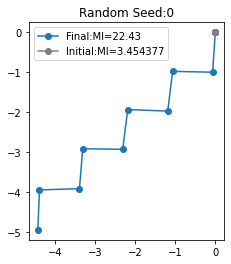

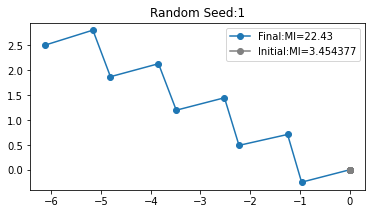

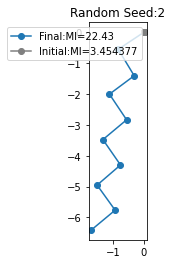

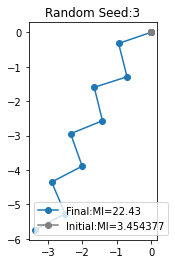

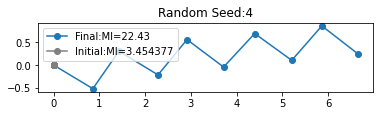

In [35]:
zero = step_size*np.zeros((T,2))

iniMI = x_objective(np.array([zero]))[0]

n_pass = 20


for seed in range(5):
    
    x = np.array(zero)
    np.random.seed(seed)

    for _ in range(n_pass):
        x_best =  u_local_improve(x,x_objective,step_size,ref,R=np.ones((T,len(ref)))*100)

        x = x_best

    MI = x_objective(np.array([x]))[0]
    plt.plot(x[:,0],x[:,1],marker='o',label='Final:MI={:.2f}'.format(MI))
    plt.plot(zero[:,0],zero[:,1],marker='o',label = 'Initial:MI={:2f}'.format(iniMI),color = 'grey')

    plt.title("Random Seed:{}".format(seed))
    # plt.ylim((-5,5))
    # plt.xlim((-5,5))

    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()

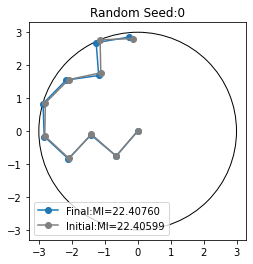

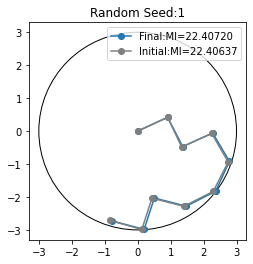

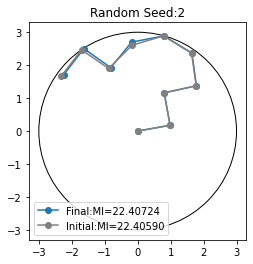

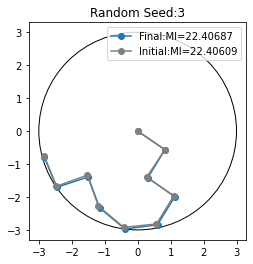

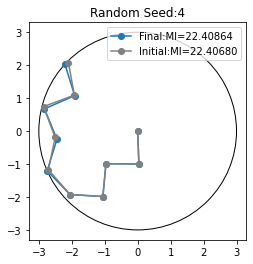

In [29]:
from RKHS import k

kernel = partial(k,c=c,l=l)


n_pass = 20


for seed in range(5):
    
    np.random.seed(seed)

    greedy = incremental_greedy(kernel,search_region_center,step_size,ref,R,T,var_0,c)

    iniMI = x_objective(np.array([greedy]))[0]
    
    x = np.array(greedy)

    for _ in range(n_pass):
        x_best = u_local_improve(x,x_objective,step_size,ref,R)
        x = x_best

    MI = x_objective(np.array([x]))[0]
    plt.plot(x[:,0],x[:,1],marker='o',label='Final:MI={:.5f}'.format(MI))
    plt.plot(greedy[:,0],greedy[:,1],marker='o',label = 'Initial:MI={:.5f}'.format(iniMI),color = 'grey')
    
    ax = plt.gca()
    
    circ = plt.Circle(search_region_center,search_region_radius,fill=False)
    ax.add_patch(circ)
    ax.set_aspect('equal')
    
    plt.title("Random Seed:{}".format(seed))
    # plt.ylim((-5,5))
    # plt.xlim((-5,5))
    plt.legend()
    plt.show()